In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data / 255.0 
y = mnist.target.astype(int)

d:\Anaconda\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [4]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

C:\Users\deshik\AppData\Local\Temp\ipykernel_21904\2352308021.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=label, cmap='tab10', s=5)
C:\Users\deshik\AppData\Local\Temp\ipykernel_21904\2352308021.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_tsne[y == label, 0], X_tsne[y == label, 1], label=label, cmap='tab10', s=5)


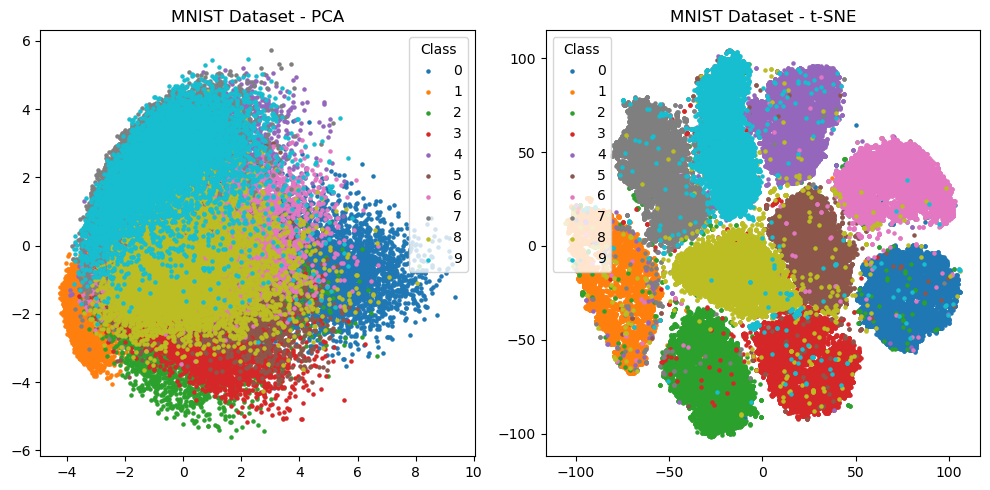

In [12]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
for label in np.unique(y):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=label, cmap='tab10', s=5)
plt.title('MNIST Dataset - PCA')
plt.legend(title='Class')
plt.tight_layout()

plt.subplot(1, 2, 2)
for label in np.unique(y):
    plt.scatter(X_tsne[y == label, 0], X_tsne[y == label, 1], label=label, cmap='tab10', s=5)
plt.title('MNIST Dataset - t-SNE')
plt.legend(title='Class')
plt.tight_layout()

plt.show()


# Task2

In [6]:
import os
import re
from PIL import Image
import numpy as np

def read_images(directory):
    x_train = []
    y_train = []
    target_width = 92
    target_height = 112
    
    # Loop through each friend's directory in the train directory
    for friend_dir in os.listdir(directory):
        friend_path = os.path.join(directory, friend_dir)
        
        # Check if the path is a directory
        if os.path.isdir(friend_path):
            print(f"Processing directory: {friend_path}")  # Print the current directory being processed
            
            # Loop through each image in the friend's directory
            for image_file in os.listdir(friend_path):
                image_path = os.path.join(friend_path, image_file)
                
                try:
                    # Check if the file is an image
                    if os.path.isfile(image_path) and image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                        # Open the image using PIL and convert to grayscale
                        img = Image.open(image_path).convert('L')
                        
                        # Resize the image to a consistent shape
                        img = img.resize((target_width, target_height))
                        
                        # Convert the image to numpy array
                        img_array = np.array(img)
                        
                        # Append the image array to x_train
                        x_train.append(img_array)

                        # Extract the friend's name from the image filename
                        friend_name = extract_friend_name(image_file)

                        # Append the friend's name to y_train
                        y_train.append(friend_name)
                except Exception as e:
                    print(f"Error reading image {image_path}: {e}")
    
    return np.array(x_train), np.array(y_train)

def extract_friend_name(image_filename):
    # Extract friend's name from the image filename
    if '_' in image_filename:
        friend_name = image_filename.split('_')[0]  # Assuming friend's name is before the first underscore
    else:
        # If underscore is not present, find the index of the first number
        idx = next((i for i, c in enumerate(image_filename) if c.isdigit()), None)
        if idx is not None:
            friend_name = image_filename[:idx]  # Extract name before the first number
        else:
            friend_name = image_filename.split('.')[0]  # Assuming friend's name is before the first dot (.)
    return friend_name

# Provide the path to the train directory
train_directory = r"F:\Sem6\Computer Vision\Lab\Lab8\Train"  # Use raw string literal to avoid escaping backslashes

# Read images and corresponding labels
x_train, y_train = read_images(train_directory)

# Print the shape of x_train and y_train
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)


Processing directory: F:\Sem6\Computer Vision\Lab\Lab8\Train\10 files from Aadit Sharma on Mar 5, 2024
Processing directory: F:\Sem6\Computer Vision\Lab\Lab8\Train\10 files from Aman Verma on Mar 4, 2024
Processing directory: F:\Sem6\Computer Vision\Lab\Lab8\Train\10 files from Anudeep Talari on Mar 4, 2024
Processing directory: F:\Sem6\Computer Vision\Lab\Lab8\Train\10 files from Anurag Deo on Mar 4, 2024
Processing directory: F:\Sem6\Computer Vision\Lab\Lab8\Train\10 files from Archit Sharma on Mar 5, 2024
Processing directory: F:\Sem6\Computer Vision\Lab\Lab8\Train\10 files from Aritra Bhaduri on Mar 4, 2024
Processing directory: F:\Sem6\Computer Vision\Lab\Lab8\Train\10 files from Arkadeep Acharya on Mar 4, 2024
Processing directory: F:\Sem6\Computer Vision\Lab\Lab8\Train\10 files from Aryan Sahoo on Mar 5, 2024
Processing directory: F:\Sem6\Computer Vision\Lab\Lab8\Train\10 files from Ashutosh Kumar on Mar 5, 2024
Processing directory: F:\Sem6\Computer Vision\Lab\Lab8\Train\10 fil

In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

print("Mapping of original labels to encoded numbers:")
for label, encoded_label in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{label}: {encoded_label}")

Mapping of original labels to encoded numbers:
Aman: 0
Anudeep: 1
Anurag: 2
Archit: 3
Aryan: 4
Ashutosh: 5
Bhavika: 6
Biswajit: 7
Devendra: 8
Haritha: 9
Ishani: 10
Karthik: 11
Mukund: 12
Pichikala: 13
Pragya: 14
Shrey: 15
Tejas: 16
aadit: 17
ankith: 18
aritra: 19
arkadeep: 20
atul: 21
deshik: 22
eshwar: 23
lalit: 24
prakash: 25
rakesh: 26
sravanth: 27
sreya: 28
sunny: 29
swapnil: 30
toshit: 31
varshith: 32
vinod: 33
yashveer: 34


In [ ]:
pca_ai21b = PCA(n_components=2)
X_pca_ai21b = pca_ai21b.fit_transform(x_train.reshape(x_train.shape[0], -1))

tsne_ai21b = TSNE(n_components=2, random_state=42)
X_tsne_ai21b = tsne_ai21b.fit_transform(x_train.reshape(x_train.shape[0], -1))


C:\Users\deshik\AppData\Local\Temp\ipykernel_21904\3186997123.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca_ai21b[y_train_encoded == label, 0], X_pca_ai21b[y_train_encoded == label, 1], label=label, cmap='tab10', s=5)
C:\Users\deshik\AppData\Local\Temp\ipykernel_21904\3186997123.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_tsne_ai21b[y_train_encoded == label, 0], X_tsne_ai21b[y_train_encoded == label, 1], label=label, cmap='tab10', s=5)


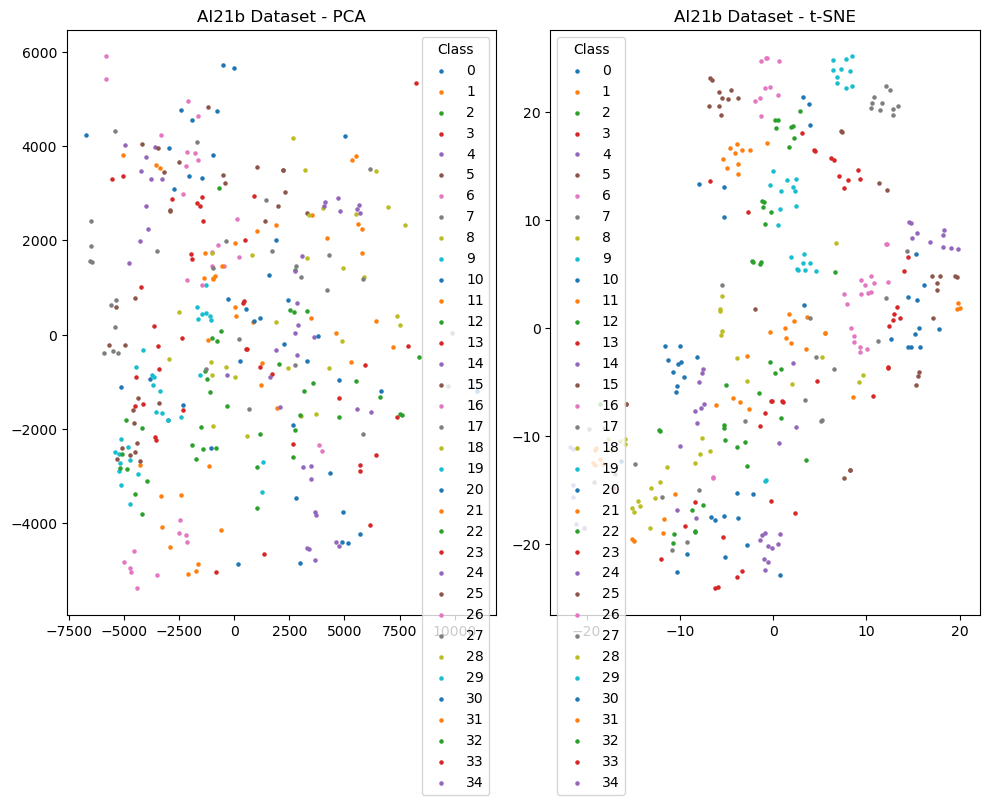

In [21]:
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
for label in np.unique(y_train_encoded):
    plt.scatter(X_pca_ai21b[y_train_encoded == label, 0], X_pca_ai21b[y_train_encoded == label, 1], label=label, cmap='tab10', s=5)
plt.title('AI21b Dataset - PCA')
plt.legend(title='Class')
plt.tight_layout()

plt.subplot(1, 2, 2)
for label in np.unique(y_train_encoded):
    plt.scatter(X_tsne_ai21b[y_train_encoded == label, 0], X_tsne_ai21b[y_train_encoded == label, 1], label=label, cmap='tab10', s=5)
plt.title('AI21b Dataset - t-SNE')
plt.legend(title='Class')
plt.tight_layout()

plt.show()

In [ ]:
fashion_mnist = fetch_openml('Fashion-MNIST', version=1)
X_fashion = fashion_mnist.data / 255.0
y_fashion = fashion_mnist.target.astype(int)

pca_fashion = PCA(n_components=2)
X_pca_fashion = pca_fashion.fit_transform(X_fashion)

tsne_fashion = TSNE(n_components=2, random_state=42)
X_tsne_fashion = tsne_fashion.fit_transform(X_fashion)

C:\Users\deshik\AppData\Local\Temp\ipykernel_21904\4182101503.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca_fashion[y_fashion == label, 0], X_pca_fashion[y_fashion == label, 1], label=label, cmap='tab10', s=5)
C:\Users\deshik\AppData\Local\Temp\ipykernel_21904\4182101503.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_tsne_fashion[y_fashion == label, 0], X_tsne_fashion[y_fashion == label, 1], label=label, cmap='tab10', s=5)


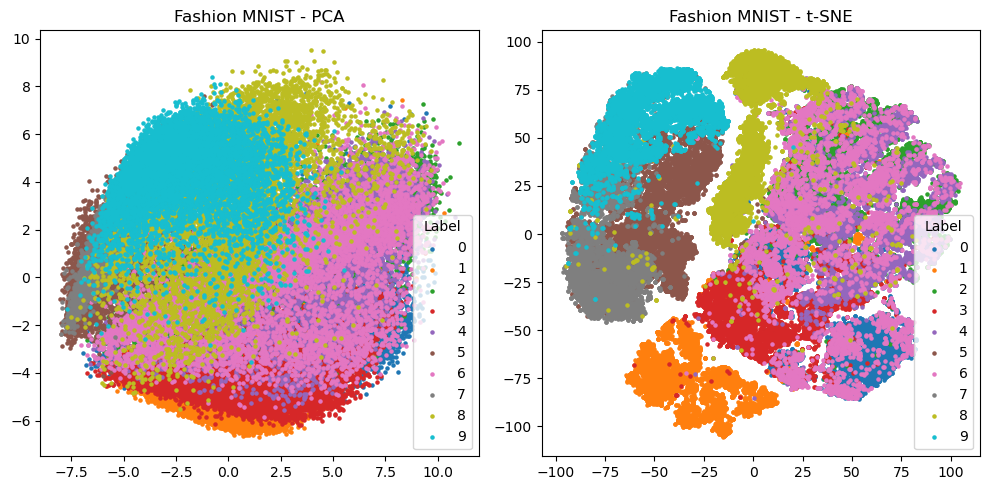

In [22]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
for label in np.unique(y_fashion):
    plt.scatter(X_pca_fashion[y_fashion == label, 0], X_pca_fashion[y_fashion == label, 1], label=label, cmap='tab10', s=5)
plt.title('Fashion MNIST - PCA')
plt.legend(title='Label')
plt.tight_layout()

plt.subplot(1, 2, 2)
for label in np.unique(y_fashion):
    plt.scatter(X_tsne_fashion[y_fashion == label, 0], X_tsne_fashion[y_fashion == label, 1], label=label, cmap='tab10', s=5)
plt.title('Fashion MNIST - t-SNE')
plt.legend(title='Label')
plt.tight_layout()

plt.show()


# Task3

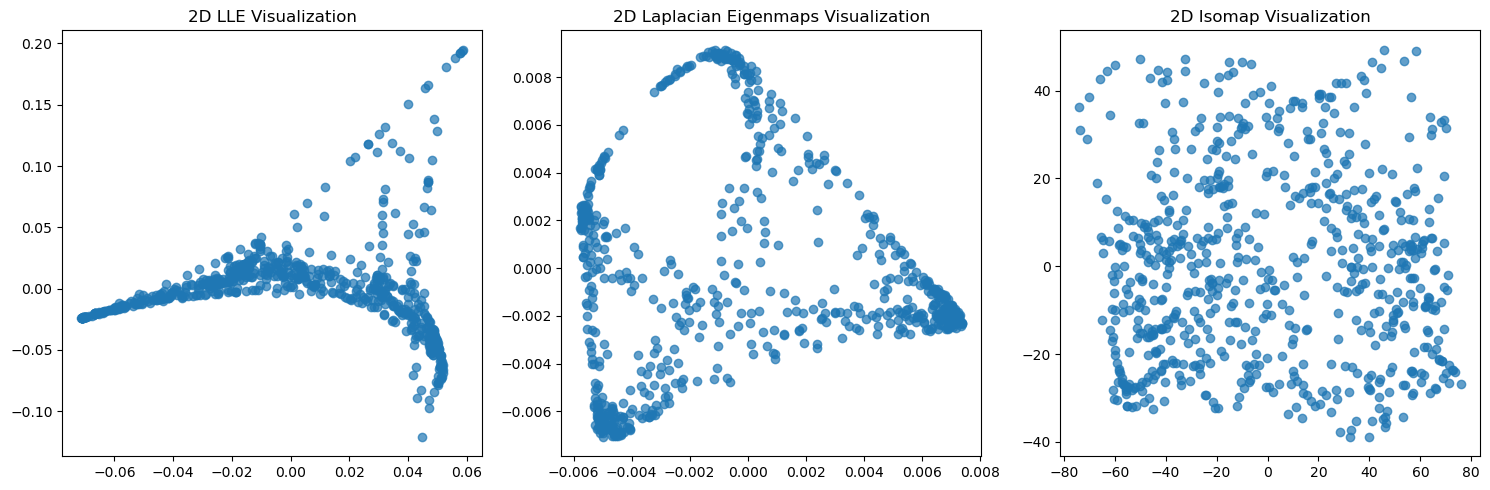

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import LocallyLinearEmbedding, SpectralEmbedding, Isomap
from scipy.io import loadmat

mat = loadmat('face_data.mat')
face_data = mat['images'].T  
face_data_flat = face_data.reshape(face_data.shape[0], -1)


lle = LocallyLinearEmbedding(n_components=2)
face_data_lle = lle.fit_transform(face_data_flat)

laplacian = SpectralEmbedding(n_components=2)
face_data_laplacian = laplacian.fit_transform(face_data_flat)

isomap = Isomap(n_components=2)
face_data_isomap = isomap.fit_transform(face_data_flat)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(face_data_lle[:, 0], face_data_lle[:, 1], alpha=0.7)
plt.title('2D LLE Visualization')

plt.subplot(1, 3, 2)
plt.scatter(face_data_laplacian[:, 0], face_data_laplacian[:, 1], alpha=0.7)
plt.title('2D Laplacian Eigenmaps Visualization')

plt.subplot(1, 3, 3)
plt.scatter(face_data_isomap[:, 0], face_data_isomap[:, 1], alpha=0.7)
plt.title('2D Isomap Visualization')

plt.tight_layout()
plt.show()

In [26]:
import pandas as pd
from sklearn import manifold
import math

df = pd.DataFrame(mat['images']).T
num_images, num_pixels = df.shape
pixels_per_dimension = int(math.sqrt(num_pixels))

for idx in df.index:
    df.loc[idx] = df.loc[idx].values.reshape(pixels_per_dimension, pixels_per_dimension).T.reshape(-1)

iso = manifold.Isomap(n_neighbors=7, n_components=2)

iso.fit(df)
manifold_2Da = iso.transform(df)
manifold_2D = pd.DataFrame(manifold_2Da, columns=['Component 1', 'Component 2'])

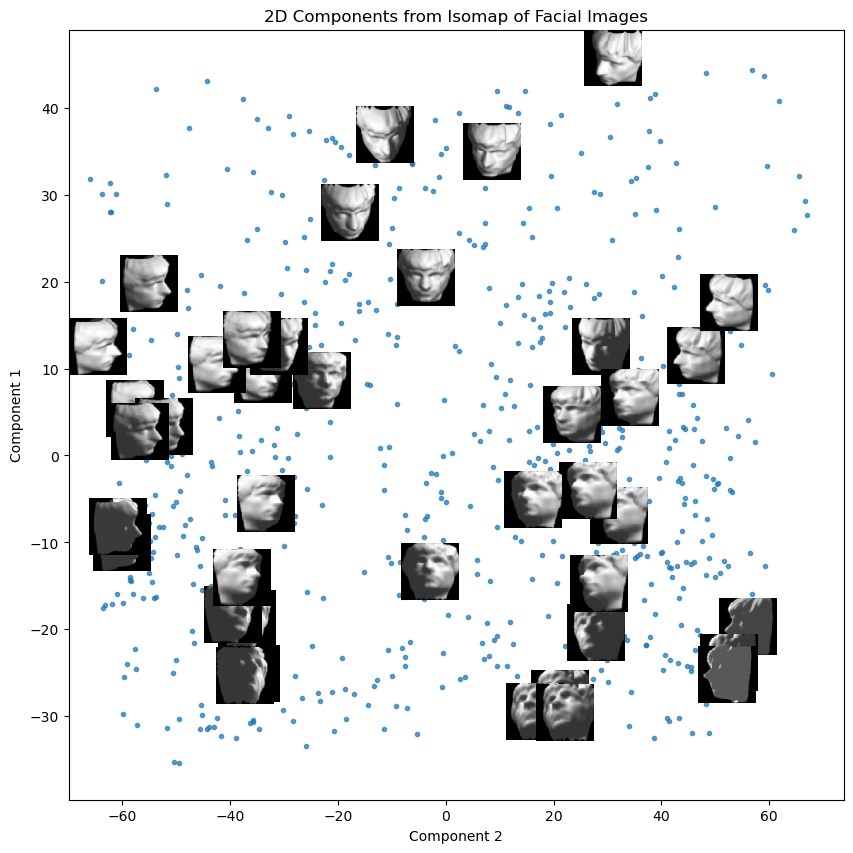

In [27]:
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('2D Components from Isomap of Facial Images')
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')

x_size = (max(manifold_2D['Component 1']) - min(manifold_2D['Component 1'])) * 0.08
y_size = (max(manifold_2D['Component 2']) - min(manifold_2D['Component 2'])) * 0.08
for i in range(40):
    img_num = np.random.randint(0, num_images)
    x0 = manifold_2D.loc[img_num, 'Component 1'] - (x_size / 2.)
    y0 = manifold_2D.loc[img_num, 'Component 2'] - (y_size / 2.)
    x1 = manifold_2D.loc[img_num, 'Component 1'] + (x_size / 2.)
    y1 = manifold_2D.loc[img_num, 'Component 2'] + (y_size / 2.)
    img = df.iloc[img_num,:].values.reshape(pixels_per_dimension, pixels_per_dimension)
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray, 
              interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))
ax.scatter(manifold_2D['Component 1'], manifold_2D['Component 2'], marker='.',alpha=0.7)

ax.set_ylabel('Component 1')
ax.set_xlabel('Component 2')

plt.show()

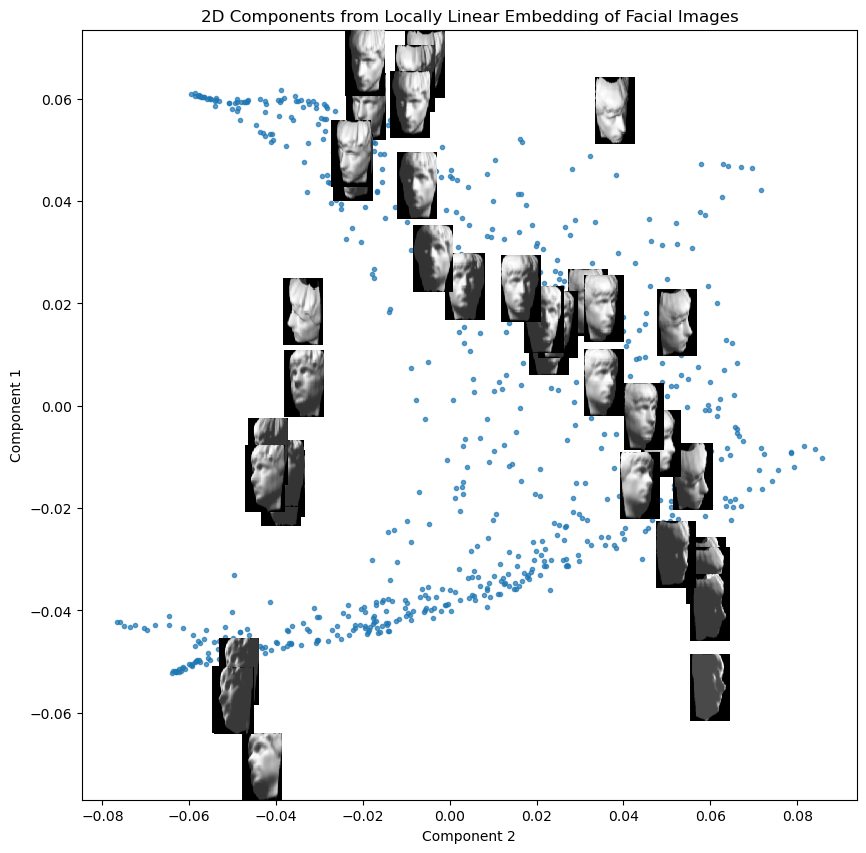

In [28]:
lle = LocallyLinearEmbedding(n_neighbors=7, n_components=2)
lle_result = lle.fit_transform(df)
lle_df = pd.DataFrame(lle_result, columns=['Component 1', 'Component 2'])

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('2D Components from Locally Linear Embedding of Facial Images')
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')

x_size = (max(lle_df['Component 1']) - min(lle_df['Component 1'])) * 0.08
y_size = (max(lle_df['Component 2']) - min(lle_df['Component 2'])) * 0.08
for i in range(40):
    img_num = np.random.randint(0, num_images)
    x0 = lle_df.loc[img_num, 'Component 1'] - (x_size / 2.)
    y0 = lle_df.loc[img_num, 'Component 2'] - (y_size / 2.)
    x1 = lle_df.loc[img_num, 'Component 1'] + (x_size / 2.)
    y1 = lle_df.loc[img_num, 'Component 2'] + (y_size / 2.)
    img = df.iloc[img_num, :].values.reshape(pixels_per_dimension, pixels_per_dimension)
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray, interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

ax.scatter(lle_df['Component 2'], lle_df['Component 1'], marker='.', alpha=0.7)

ax.set_ylabel('Component 1')
ax.set_xlabel('Component 2')

plt.show()

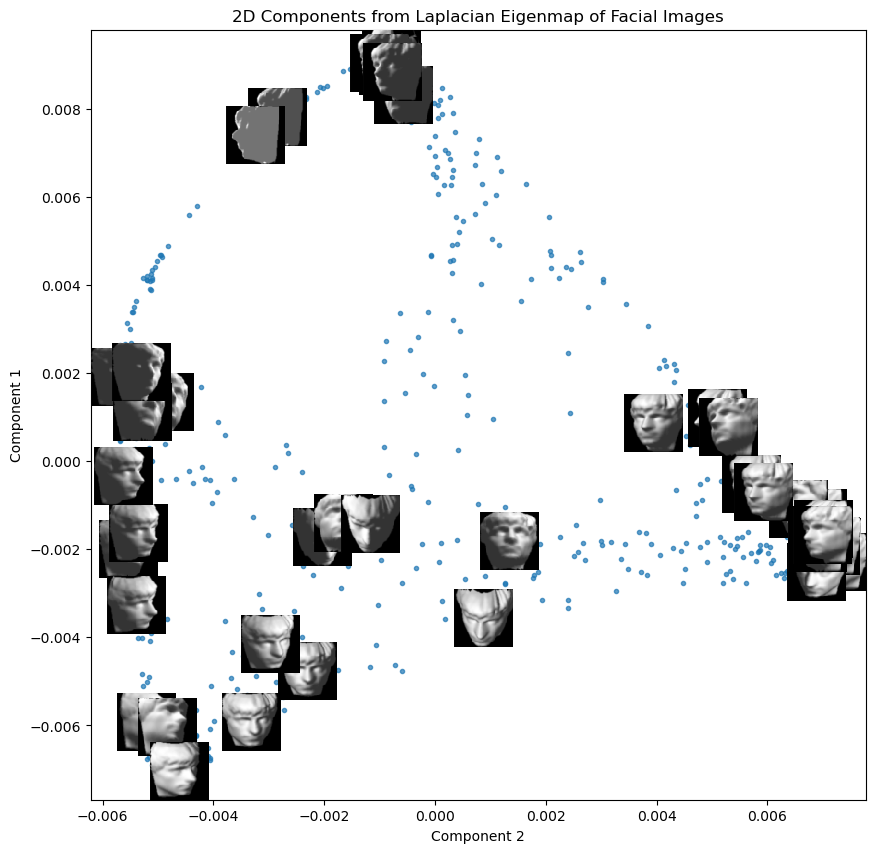

In [29]:
laplacian = SpectralEmbedding(n_components=2)
laplacian_result = laplacian.fit_transform(df)
laplacian_df = pd.DataFrame(laplacian_result, columns=['Component 1', 'Component 2'])

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('2D Components from Laplacian Eigenmap of Facial Images')
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')

x_size = (max(laplacian_df['Component 1']) - min(laplacian_df['Component 1'])) * 0.08
y_size = (max(laplacian_df['Component 2']) - min(laplacian_df['Component 2'])) * 0.08
for i in range(40):
    img_num = np.random.randint(0, num_images)
    x0 = laplacian_df.loc[img_num, 'Component 1'] - (x_size / 2.)
    y0 = laplacian_df.loc[img_num, 'Component 2'] - (y_size / 2.)
    x1 = laplacian_df.loc[img_num, 'Component 1'] + (x_size / 2.)
    y1 = laplacian_df.loc[img_num, 'Component 2'] + (y_size / 2.)
    img = df.iloc[img_num, :].values.reshape(pixels_per_dimension, pixels_per_dimension)
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray, interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

ax.scatter(laplacian_df['Component 1'], laplacian_df['Component 2'], marker='.', alpha=0.7)

ax.set_ylabel('Component 1')
ax.set_xlabel('Component 2')

plt.show()

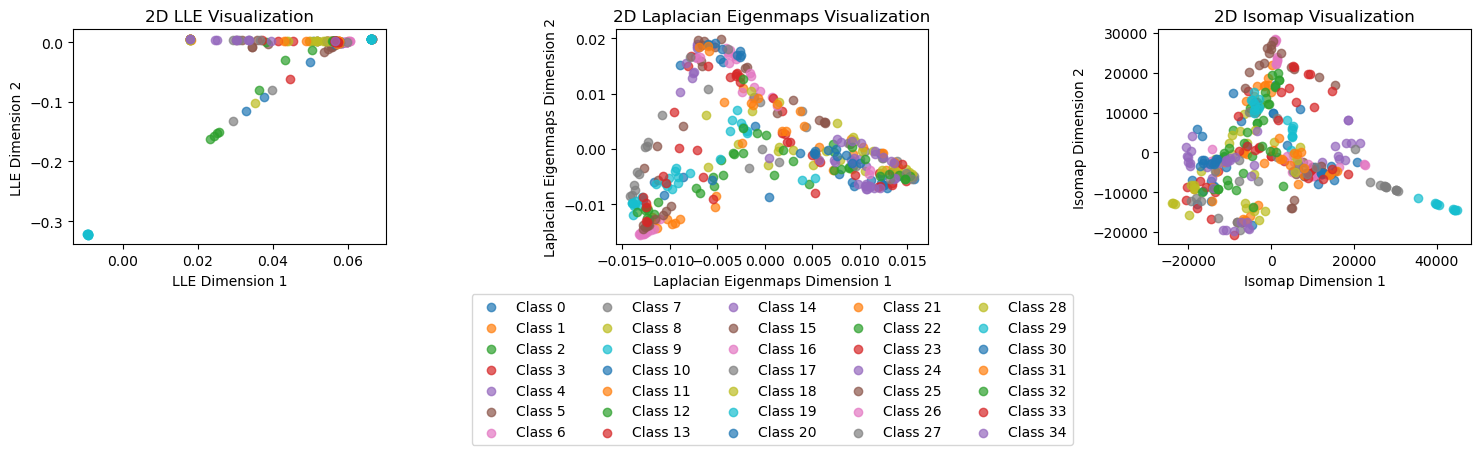

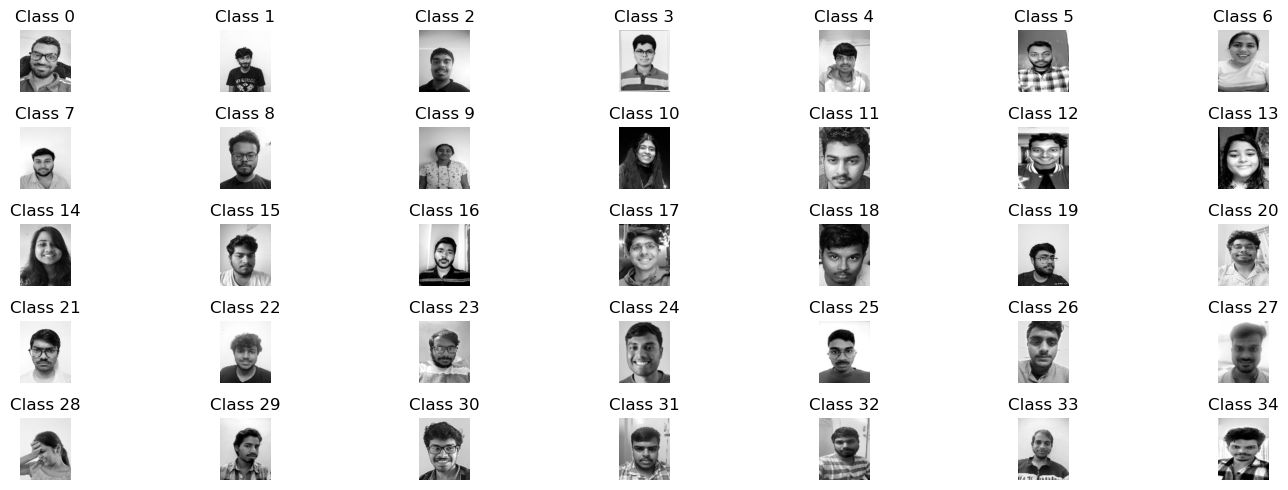

In [38]:

x_train_flat = x_train.reshape(x_train.shape[0], -1)

lle = LocallyLinearEmbedding(n_components=2)
x_train_lle = lle.fit_transform(x_train_flat)

laplacian = SpectralEmbedding(n_components=2)
x_train_laplacian = laplacian.fit_transform(x_train_flat)

isomap = Isomap(n_components=2)
x_train_isomap = isomap.fit_transform(x_train_flat)

plt.figure(figsize=(15, 5))  
plt.subplot(1, 3, 1)  
for class_label in range(35):
    class_indices = np.where(y_train_encoded == class_label)[0]
    plt.scatter(x_train_lle[class_indices, 0], x_train_lle[class_indices, 1], label=f'Class {class_label}', alpha=0.7)
plt.title('2D LLE Visualization')
plt.xlabel('LLE Dimension 1')
plt.ylabel('LLE Dimension 2')

plt.subplot(1, 3, 2) 
for class_label in range(35):
    class_indices = np.where(y_train_encoded == class_label)[0]
    plt.scatter(x_train_laplacian[class_indices, 0], x_train_laplacian[class_indices, 1], label=f'Class {class_label}', alpha=0.7)
plt.title('2D Laplacian Eigenmaps Visualization')
plt.xlabel('Laplacian Eigenmaps Dimension 1')
plt.ylabel('Laplacian Eigenmaps Dimension 2')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5)

plt.subplot(1, 3, 3)  
for class_label in range(35):
    class_indices = np.where(y_train_encoded == class_label)[0]
    plt.scatter(x_train_isomap[class_indices, 0], x_train_isomap[class_indices, 1], label=f'Class {class_label}', alpha=0.7)
plt.title('2D Isomap Visualization')
plt.xlabel('Isomap Dimension 1')
plt.ylabel('Isomap Dimension 2')

plt.tight_layout()  
plt.show()


plt.figure(figsize=(15, 5))

unique_classes = np.unique(y_train_encoded)
num_classes = len(unique_classes)
num_rows = 5
num_cols = 7  
for i, class_label in enumerate(unique_classes):
    plt.subplot(num_rows, num_cols, i + 1)
    class_indices = np.where(y_train_encoded == class_label)[0]

    first_image_size = x_train[class_indices[0]].shape

    if len(first_image_size) == 1:
        image_size = int(np.sqrt(first_image_size[0]))
        first_image = x_train[class_indices[0]].reshape(image_size, image_size)
    else:
        first_image = x_train[class_indices[0]].reshape(first_image_size)

    plt.imshow(first_image, cmap='gray')
    plt.title(f'Class {class_label}')
    plt.axis('off')

plt.tight_layout()
plt.show()


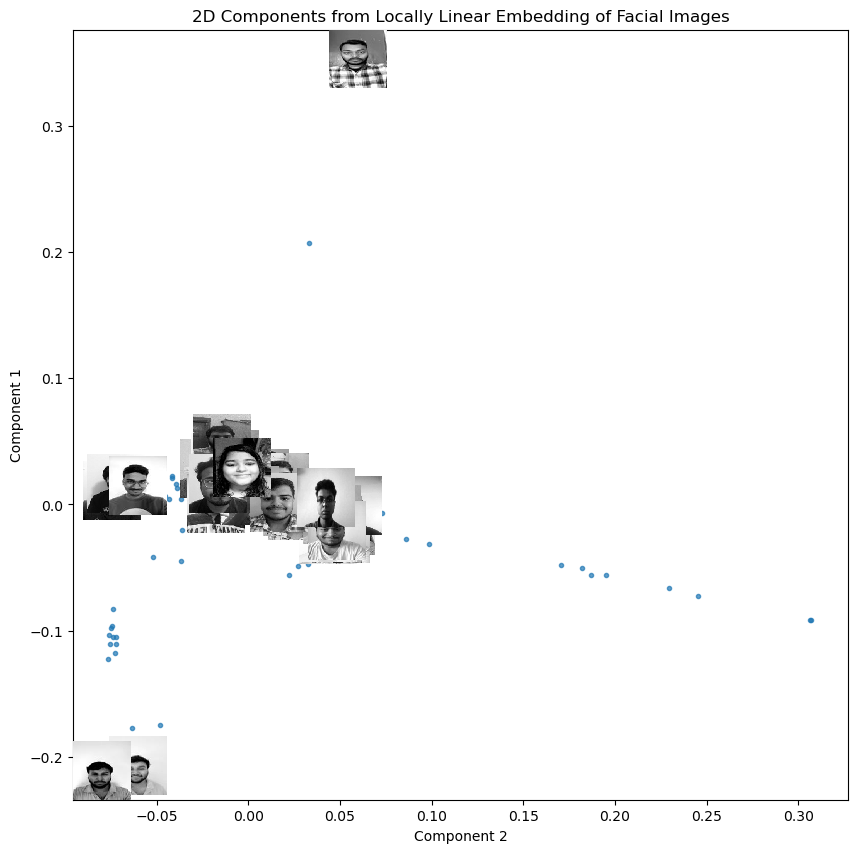

In [36]:
lle = LocallyLinearEmbedding(n_neighbors=10, n_components=2)
lle_result = lle.fit_transform(x_train_flat)
lle_df = pd.DataFrame(lle_result, columns=['Component 1', 'Component 2'])

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('2D Components from Locally Linear Embedding of Facial Images')
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')

x_size = (max(lle_df['Component 1']) - min(lle_df['Component 1'])) * 0.08
y_size = (max(lle_df['Component 2']) - min(lle_df['Component 2'])) * 0.08
for i in range(40):
    img_num = np.random.randint(0, x_train.shape[0])
    x0 = lle_df.loc[img_num, 'Component 1'] - (x_size / 2.)
    y0 = lle_df.loc[img_num, 'Component 2'] - (y_size / 2.)
    x1 = lle_df.loc[img_num, 'Component 1'] + (x_size / 2.)
    y1 = lle_df.loc[img_num, 'Component 2'] + (y_size / 2.)
    img = x_train[img_num].reshape(112, 92)
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray, interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

ax.scatter(lle_df['Component 1'], lle_df['Component 2'], marker='.', alpha=0.7)

ax.set_ylabel('Component 1')
ax.set_xlabel('Component 2')

plt.show()

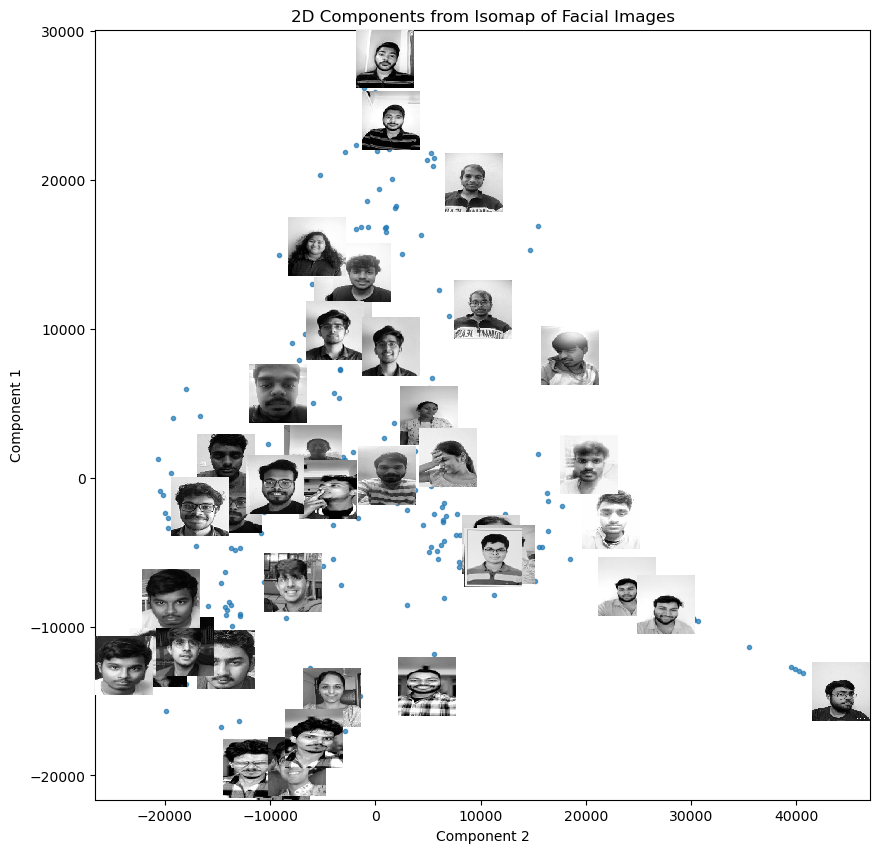

In [34]:

isomap = Isomap(n_components=2)
isomap_result = isomap.fit_transform(x_train_flat)
isomap_df = pd.DataFrame(isomap_result, columns=['Component 1', 'Component 2'])

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('2D Components from Isomap of Facial Images')
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')

x_size = (max(isomap_df['Component 1']) - min(isomap_df['Component 1'])) * 0.08
y_size = (max(isomap_df['Component 2']) - min(isomap_df['Component 2'])) * 0.08
for i in range(40):
    img_num = np.random.randint(0, x_train.shape[0])
    x0 = isomap_df.loc[img_num, 'Component 1'] - (x_size / 2.)
    y0 = isomap_df.loc[img_num, 'Component 2'] - (y_size / 2.)
    x1 = isomap_df.loc[img_num, 'Component 1'] + (x_size / 2.)
    y1 = isomap_df.loc[img_num, 'Component 2'] + (y_size / 2.)
    img = x_train[img_num].reshape(112, 92)
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray, interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

ax.scatter(isomap_df['Component 1'], isomap_df['Component 2'], marker='.', alpha=0.7)

ax.set_ylabel('Component 1')
ax.set_xlabel('Component 2')

plt.show()


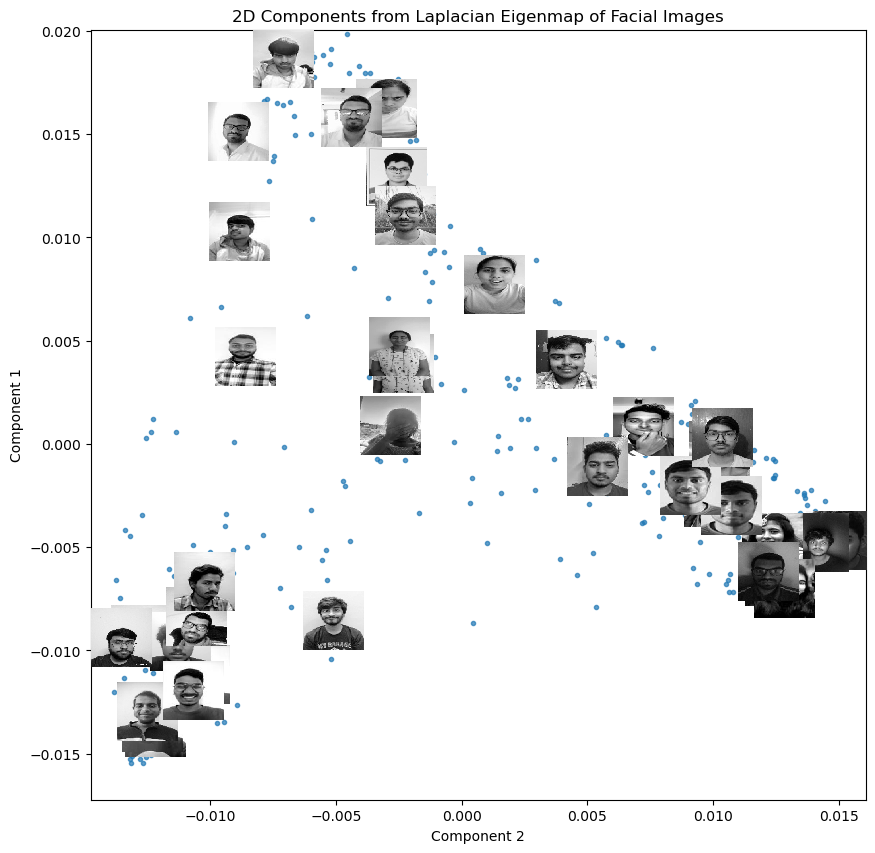

In [35]:
laplacian = SpectralEmbedding(n_components=2)
laplacian_result = laplacian.fit_transform(x_train_flat)
laplacian_df = pd.DataFrame(laplacian_result, columns=['Component 1', 'Component 2'])

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('2D Components from Laplacian Eigenmap of Facial Images')
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')

x_size = (max(laplacian_df['Component 1']) - min(laplacian_df['Component 1'])) * 0.08
y_size = (max(laplacian_df['Component 2']) - min(laplacian_df['Component 2'])) * 0.08
for i in range(40):
    img_num = np.random.randint(0, x_train.shape[0])
    x0 = laplacian_df.loc[img_num, 'Component 1'] - (x_size / 2.)
    y0 = laplacian_df.loc[img_num, 'Component 2'] - (y_size / 2.)
    x1 = laplacian_df.loc[img_num, 'Component 1'] + (x_size / 2.)
    y1 = laplacian_df.loc[img_num, 'Component 2'] + (y_size / 2.)
    img = x_train[img_num].reshape(112, 92)
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray, interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

ax.scatter(laplacian_df['Component 1'], laplacian_df['Component 2'], marker='.', alpha=0.7)

ax.set_ylabel('Component 1')
ax.set_xlabel('Component 2')

plt.show()